In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pyorb

%matplotlib widget

In [3]:
Centaurs = pd.read_csv("Data/Centaurs.csv")
Centaurs = Centaurs[['a', 'e', 'i', 'w', 'om', 'ma']]
Centaurs.loc[:, 'a'] = Centaurs['a'] * 1.496e+11
Centaurs.loc[:, 'w'] = np.radians(Centaurs['w']) 
Centaurs.loc[:, 'om'] = np.radians(Centaurs['om'])
Centaurs.loc[:, 'ma'] = np.radians(Centaurs['ma'])

In [4]:
Centaurs.head

<bound method NDFrame.head of                 a       e       i         w        om        ma
0    8.569088e+11  0.6622   42.56  0.986809  0.373850  2.734407
1    2.051016e+12  0.3774    6.92  5.921204  3.652974  3.577227
2    3.033888e+12  0.5742   24.73  6.189636  2.082352  2.275560
3    1.775752e+12  0.8663   61.83  3.334975  5.483126  5.234591
4    3.672680e+12  0.5163   15.63  2.975437  0.547161  1.695413
..            ...     ...     ...       ...       ...       ...
899  3.063808e+12  0.5903   37.14  3.474601  4.603306  6.117379
900  2.665872e+12  0.8839  109.35  4.242197  4.172908  6.244439
901  8.757584e+11  0.2262   27.15  4.126831  2.343803  0.210661
902  1.831104e+12  0.6446   28.91  2.448173  5.980371  6.202551
903  1.249609e+12  0.2935   22.03  2.272419  5.850169  6.238679

[904 rows x 6 columns]>

In [5]:
def kep_to_cart(DF):
    Centaurs_cartesian = []
    for i in range(DF.shape[0]):
        Centaurs_cartesian.append(pyorb.kep_to_cart(DF.iloc[i].values))

    Centaurs_cartesian = pd.DataFrame(Centaurs_cartesian, columns=['x','y','z','Vx','Vy','Vz'])
    #Centaurs_cartesian.to_csv("Data/CentaursCartesian.csv")

kep_to_cart(Centaurs)

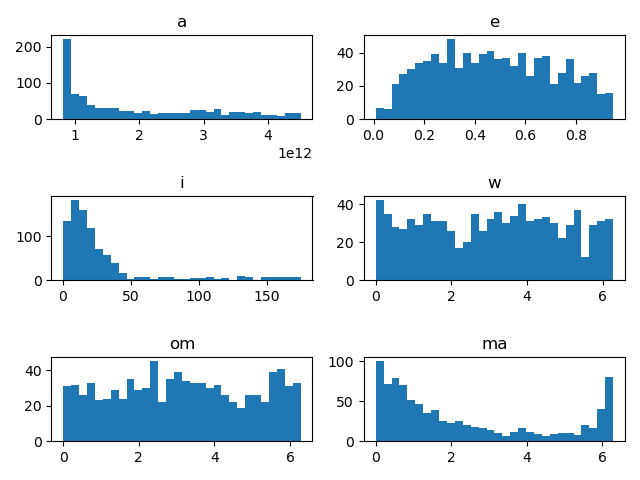

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=2)
col_point=0
for row in ax:
    for col in row:
        col.hist(Centaurs[Centaurs.columns[col_point]], bins=30)
        col.set_title(Centaurs.columns[col_point])
        col_point += 1
        
plt.tight_layout()

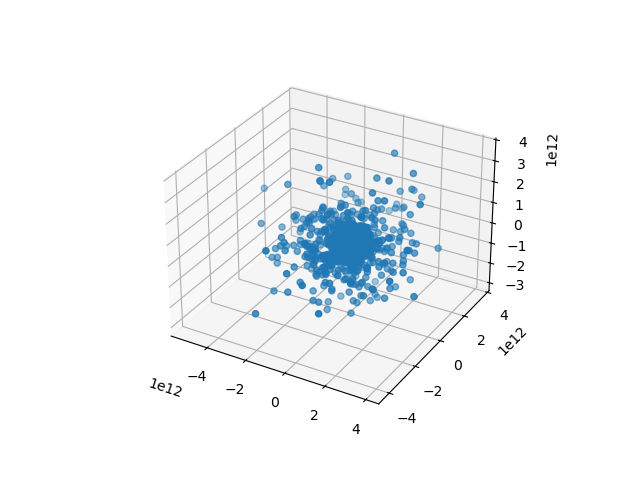

In [7]:
CartCentaurs = pd.read_csv("Data/CentaursCartesian.csv", index_col=0)
CartCentaurs.head

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(CartCentaurs['x'], CartCentaurs['y'], CartCentaurs['z'])